Graph with 20 nodes and 43 edges
True
[[0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0]
 [0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]]


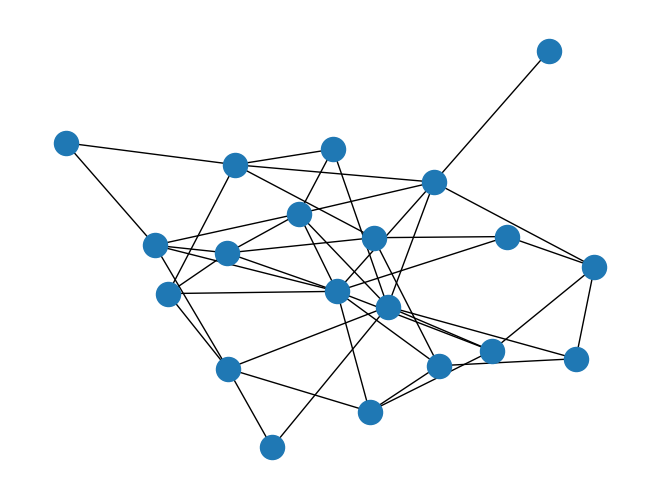

In [20]:
import numpy as np
import networkx as nx

class synthetic_data_gen:
    def __init__(self, num_vertices=20):
        self.num_vertices = num_vertices
        self.constants()
        self.create_graphs()

    def constants(self):
        self.alpha_rnd = 0.012
        self.beta_rnd = 0.79
        self.thr_rnd = 0.06

        self.alpha_er = 0.0032
        self.beta_er = 0.1
        self.thr_er = 0.08

        self.alpha_ba = 0.0025
        self.beta_ba = 0.05
        self.thr_ba = 0.18

    def create_graphs(self):
        self.create_er_graph()
        self.create_ba_graph()
        self.create_random_graph()
        return

    def create_er_graph(self):
        self.er_prob = 0.2
        self.er_graph = nx.fast_gnp_random_graph(self.num_vertices, self.er_prob)
        self.er_normL = nx.normalized_laplacian_matrix(self.er_graph)
        return

    def create_ba_graph(self):
        self.ba_graph = nx.barabasi_albert_graph(self.num_vertices, 1)
        self.ba_normL = nx.normalized_laplacian_matrix(self.ba_graph)

    def create_random_graph(self):
        self.random_graph = nx.random_geometric_graph(self.num_vertices, 0.4)
        for u, v, d in self.random_graph.edges(data=True):
            pos1 = np.array(self.random_graph.nodes[u]['pos'])
            pos2 = np.array(self.random_graph.nodes[v]['pos'])
            d['weight'] = np.exp(-np.linalg.norm(pos1 - pos2) / (2 * 0.5 * 0.5))
        self.rg_normL = nx.normalized_laplacian_matrix(self.random_graph)
        return

    def get_gs(self, graphL, num_sigs):
        D, V = np.linalg.eig(graphL)
        idx = D.argsort()[::-1]
        D = D[idx]
        V = V[:, idx]
        sigma = np.linalg.pinv(np.diag(D))
        mu = np.zeros(D.shape[0])
        gs_coeff = np.random.multivariate_normal(mu, sigma, num_sigs)
        # pdb.set_trace()
        gs = np.dot(V, gs_coeff.T)

        gs = gs + 0.5 * np.random.randn(*gs.shape)
        # Shape of gs is num_nodes x num_sigs
        # Output has each row as a signal
        return gs.T

    def get_graph_signals(self):
        # Each row is supposed to be a signal
        # pdb.set_trace()
        graph_signals_er = self.get_gs(self.er_normL.toarray(), 2)
        graph_signals_ba = self.get_gs(self.ba_normL.toarray(), 2)
        graph_signals_rand = self.get_gs(self.rg_normL.toarray(), 2)
        return (graph_signals_er, graph_signals_ba, graph_signals_rand)


if __name__ == "__main__":
    a1 = synthetic_data_gen(num_vertices=20)
    g1, g2, g3 = a1.get_graph_signals()
    print(a1.er_graph)
    print(nx.is_connected(a1.er_graph))
    nx.draw(a1.er_graph)
    print(nx.adjacency_matrix(a1.er_graph).toarray())